# Exploratory Data Analysis - IMDB Movies (Part 2)

## Introduction:
<p>This notebook contains detailed steps followed after cleansing the dataset, inorder to determine the relationshop between various attributes of movies and finding the insight. 
For more details about the origional dataset and cleansing steps, please refer <b>EDA_4_1000_IMDB_MOVIES_DATASET_PART1.ipynb</b> notebook.</p>


## Process the dataset and plot varios graphs to infere the relationship

In [5]:
#### Importing packages  
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
%matplotlib inline


In [4]:
# Read data from CSV file
movies=pd.read_csv("Movies_data_cleaned.csv")

In [6]:
#getting unique genres from multiple genres
unique_genres = pd.concat([movies['genre_1'], movies['genre_2'], movies['genre_3']]).unique()

#unique_genres = unique_genres[unique_genres.str != 'nan']

unique_genres_list=[]
for loc in unique_genres:
    loc = str(loc)   #here 'nan' is converted to a string to compare with if
    if loc != 'nan':        
        unique_genres_list.append(loc)


print (unique_genres_list)
print (len(unique_genres_list))


['Action', 'Adventure', 'Horror', 'Animation', 'Comedy', 'Biography', 'Drama', 'Crime', 'Mystery', 'Sci-Fi', 'Fantasy', 'Thriller', 'Family', 'Romance', 'History', 'Music', 'Western', 'War', 'Musical', 'Sport']
20


In [5]:
### 2. Data validation
movies.shape

(838, 16)

In [7]:
movies.head(1) 

rank                    title    director  year  runtime  rating   votes  \
0     1  Guardians of the Galaxy  James Gunn  2014      121     8.1  757074   

   revenue  metascore      actor_1      actor_2          actor_3  \
0   333.13       76.0  Chris Pratt   Vin Diesel   Bradley Cooper   

        actor_4 genre_1    genre_2 genre_3  
0   Zoe Saldana  Action  Adventure  Sci-Fi

In [19]:
# count total movies count for each genre
genre_movieCount = np.zeros(len(list(unique_genres_list)))

i = 0
for genre in unique_genres_list:
    current_genre = (movies['genre_1'] == genre) | (movies['genre_2'] == genre) | (movies['genre_3'] == genre)    
    genre_movieCount[i] = len(movies[current_genre])
    i += 1
    

#print (genre_movieCount)

genre_df = pd.DataFrame(genre_movieCount, index=unique_genres_list, columns=['MovieCount'])
genre_df.index.name='Genre'
genre_df


MovieCount
Genre                
Action          277.0
Adventure       244.0
Horror           87.0
Animation        45.0
Comedy          250.0
Biography        67.0
Drama           419.0
Crime           126.0
Mystery          86.0
Sci-Fi          107.0
Fantasy          92.0
Thriller        148.0
Family           48.0
Romance         120.0
History          25.0
Music            15.0
Western           4.0
War              10.0
Musical           5.0
Sport            15.0

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  from ipykernel import kernelapp as app


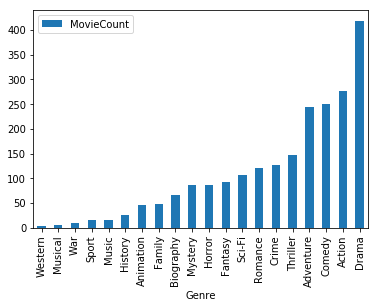

In [7]:
#dislay total movie count for Gener as a bar plot and save it to image
genre_df.sort_index(by='MovieCount').plot.bar().get_figure().savefig('genre_vs_moviecount.png', format='png')
#plt.savefig('genre_vs_moviecount.png')

In [11]:
#fig = genre_df.plot(kind='bar',  figsize=(20, 16), fontsize=26).get_figure()
#fig = genre_df.plot(kind='bar',  figsize=(20, 16), fontsize=26).get_figure()
#fig.savefig('genre_vs_moviecount.png')

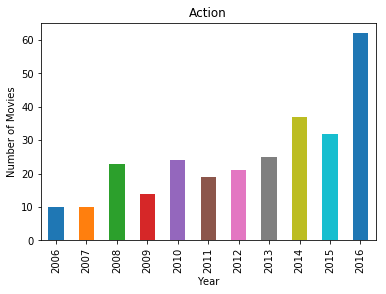

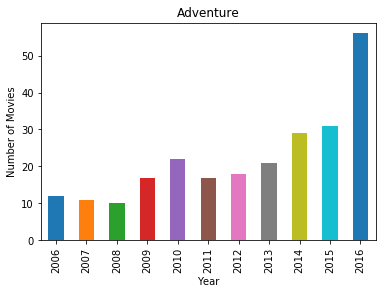

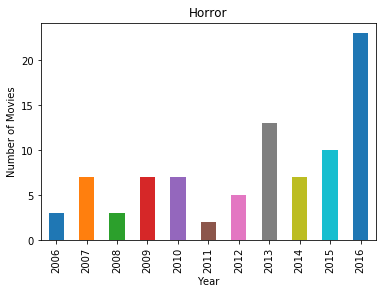

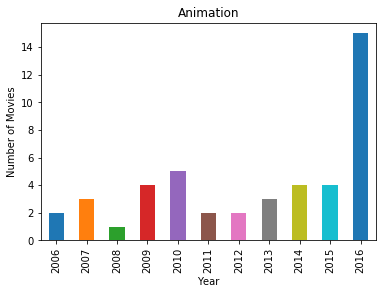

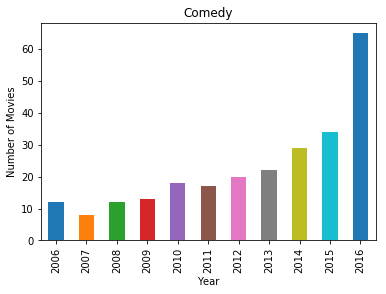

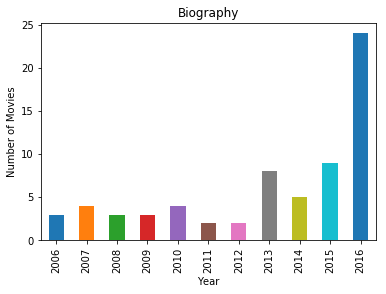

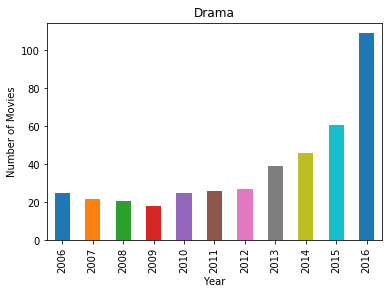

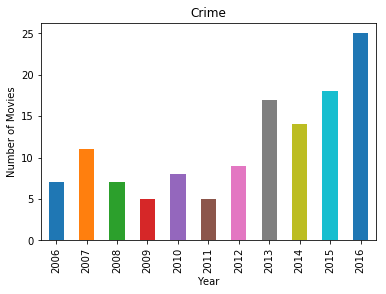

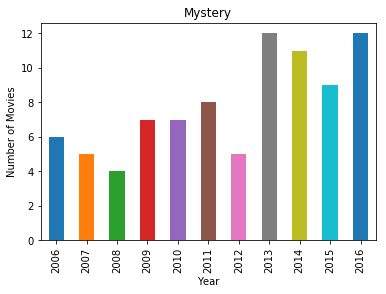

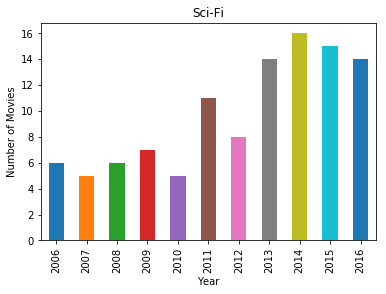

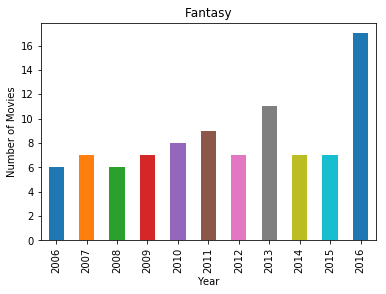

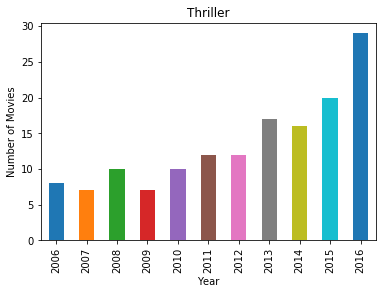

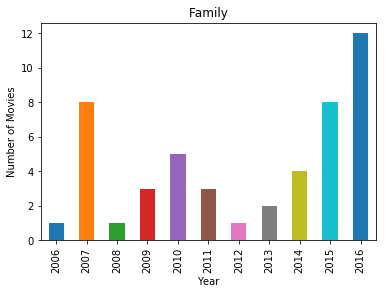

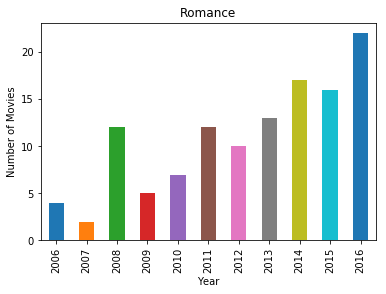

In [ ]:
#Plot bar chart genre wise and show movie count as per release year, aslo save to file
#genre_movie_year_Count = np.zeros(len(list(unique_genres)))
#i = 0
for genre in unique_genres_list:
    current_genre = (movies['genre_1'] == genre) | (movies['genre_2'] == genre) | (movies['genre_3'] == genre)
    plt.figure()
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    plt.title(str(genre))
    movies[current_genre].year.value_counts().sort_index().plot.bar().get_figure().savefig(genre + '_vs_moviecount.png', format='png')
    # print(genre, len(movies[current_genre]))
    #genre_movie_year_Count[i] = len(movies[current_genre])
    #i += 1
    
#movies.head(5)

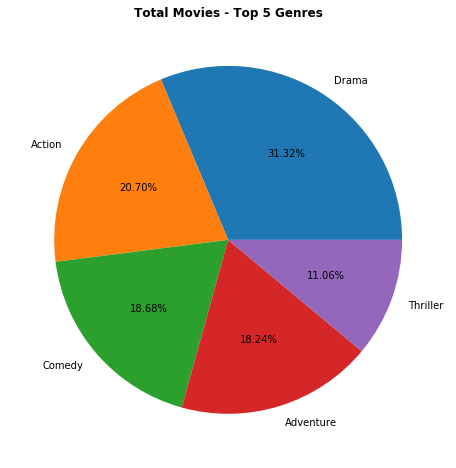

In [23]:
# Plot pie chart to show Top 5 Genres
#fig, ax = plt.subplots(figsize=(12,6), ncols=1, nrows=1)
#fig.patch.set_alpha(0.5)

genre_df.sort_values(by='MovieCount', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Total Movies - Top 5 Genres', weight='bold')

plt.savefig('top_5_genres.png',dpi=fig.dpi,bbox_inches='tight')

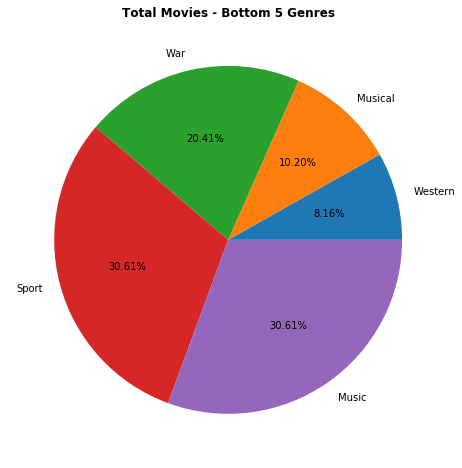

In [30]:
# Plot pie chart to show bottom 5 Genres
genre_df.sort_values(by='MovieCount', ascending=True).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Total Movies - Bottom 5 Genres', weight='bold')
plt.savefig('bottom_5_genres.png')#,dpi=fig.dpi,bbox_inches='tight'

In [40]:
#Lets see how genre is related to revenue

genre_revenue = np.zeros(len(unique_genres_list))
i = 0
for genre in unique_genres_list:
    current_genre = (movies['genre_1'] == genre) | (movies['genre_2'] == genre) | (movies['genre_3'] == genre)
    genre_revenue[i] = movies[current_genre].xs('revenue', axis=1).sum() / movies['revenue'].sum() * 100
    i += 1

genre_revenue_df = pd.DataFrame(genre_revenue, index=unique_genres_list, columns=['RevenueShare'])
genre_revenue_df.index.name='Genre'
genre_revenue_df

RevenueShare
Genre                  
Action        49.677359
Adventure     54.112744
Horror         4.592388
Animation     12.215011
Comedy        27.147538
Biography      5.581422
Drama         29.991293
Crime         11.321596
Mystery        6.609615
Sci-Fi        20.754462
Fantasy       17.273369
Thriller      14.775821
Family         8.408652
Romance        7.272564
History        1.868268
Music          0.996330
Western        0.662992
War            0.754010
Musical        0.576038
Sport          1.419810

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  from ipykernel import kernelapp as app


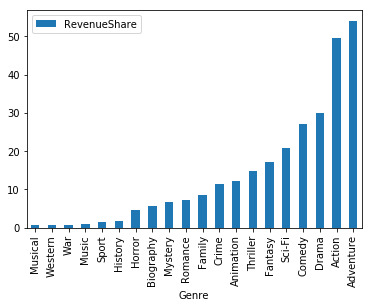

In [34]:
#dislay total revenue count for Gener as a bar plot and save it to image
genre_revenue_df.sort_index(by='RevenueShare').plot.bar().get_figure().savefig('genre_vs_revenue.png', format='png')


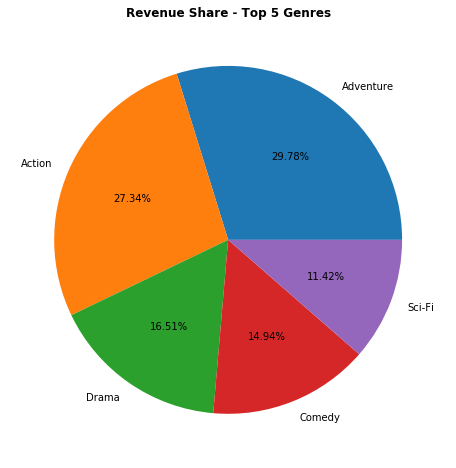

In [36]:
genre_revenue_df.sort_values(by='RevenueShare', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Revenue Share - Top 5 Genres', weight='bold')
plt.savefig('top_5_revenue_genres.png',dpi=fig.dpi,bbox_inches='tight')

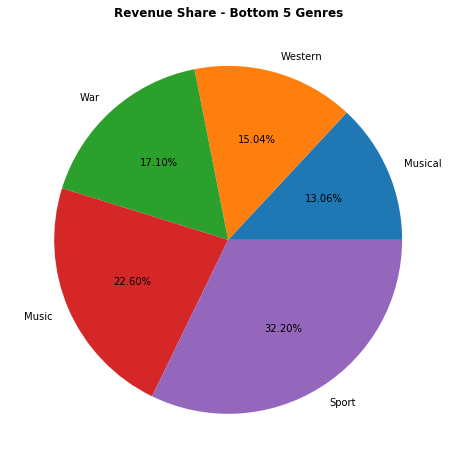

In [37]:
genre_revenue_df.sort_values(by='RevenueShare', ascending=True).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Revenue Share - Bottom 5 Genres', weight='bold')
plt.savefig('bottom_5_revenue_genres.png',dpi=fig.dpi,bbox_inches='tight')

In [41]:

genre_ratings = np.zeros(len(list(unique_genres_list)))
i = 0
for genre in unique_genres_list:
    current_genre = (movies['genre_1'] == genre) | (movies['genre_2'] == genre) | (movies['genre_3'] == genre)
    genre_ratings[i] = movies[current_genre].xs('rating', axis=1).sum() / movies['rating'].sum() * 100
    i += 1
    
genre_ratings_df = pd.DataFrame(genre_ratings, index=unique_genres_list, columns=['Ratings'])
genre_ratings_df


Ratings
Action     32.262188
Adventure  29.047002
Horror      9.580765
Animation   5.761418
Comedy     29.372723
Biography   8.628117
Drama      51.677641
Crime      15.226604
Mystery    10.494887
Sci-Fi     12.682124
Fantasy    10.682264
Thriller   17.604721
Family      5.607313
Romance    14.081325
History     3.206430
Music       1.882530
Western     0.507845
War         1.330905
Musical     0.607663
Sport       1.861516

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  from ipykernel import kernelapp as app


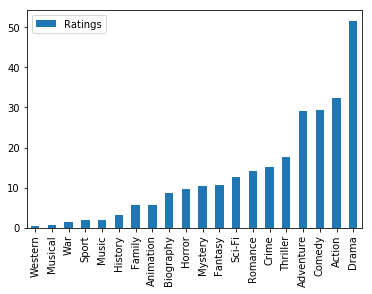

In [42]:
#dislay total ratings for Gener as a bar plot and save it to image
genre_ratings_df.sort_index(by='Ratings').plot.bar().get_figure().savefig('genre_vs_ratings.png', format='png')


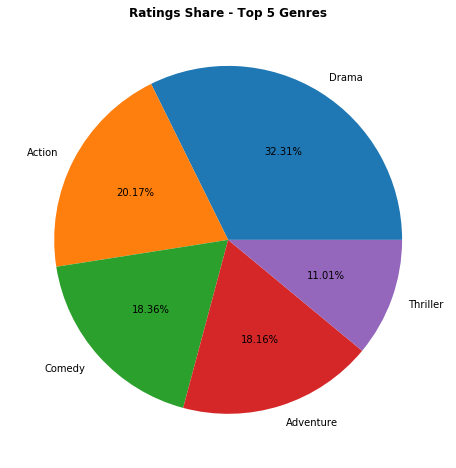

In [43]:
genre_ratings_df.sort_values(by='Ratings', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Ratings Share - Top 5 Genres', weight='bold')
plt.savefig('top_5_ratings_genres.png',dpi=fig.dpi,bbox_inches='tight')

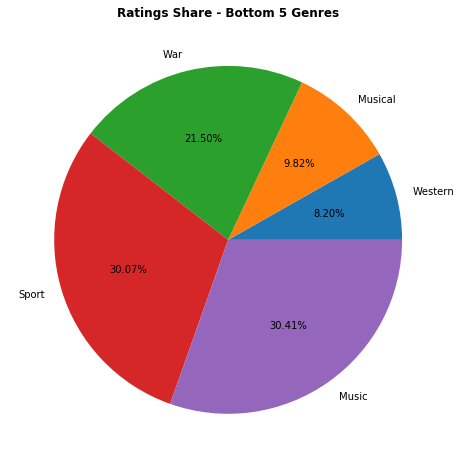

In [44]:
genre_ratings_df.sort_values(by='Ratings', ascending=True).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Ratings Share - Bottom 5 Genres', weight='bold')
plt.savefig('bottom_5_ratings_genres.png',dpi=fig.dpi,bbox_inches='tight')

## Observations
As there are multiple genres associated with each movie, it is not possible to decide which genre is having more market share but clearly Adventure and Action movies are having a good market at the box office.
They are followed by Drama, Comedy and Sci-Fi movies.

But when it comes to the number of movies that were made during the period, the highest number of movies were made in the Drama genre followed by action and comedy.

Also, the least favorite genres are Musical, Western and War.
As the number of movies made in these genres are less, their collections are also correpondingly low.

Over the years, the ratings received by movies in Drama genre is much higher compared to Adventure, Action or Comedy.


In [45]:
#### Create a copy of "movies" dataframe for Label encoding
movies_new = movies.copy(deep=True)

In [46]:
#### Dealing with Categorical Variables

from sklearn.preprocessing import LabelEncoder                                    
number = LabelEncoder()                                                           
for i in movies_new.columns:                                                          
    movies_new[i] = number.fit_transform(movies_new[i].astype('str'))
    
movies_new

rank  title  director  year  runtime  rating  votes  revenue  metascore  \
0       0    236       208     8       21      42    749      452         59   
1      99    477       417     6       24      31    588      131         48   
2     197    552       317    10       17      34    162      163         45   
3     298    535        85    10        8      33    674      378         42   
4     388    569       109    10       23      23    517      445         23   
5     482    661       520    10        3      22    647      555         25   
6     572    335        97    10       28      44    346      200         76   
7     754    708       207    10       41      32    728      725         61   
8       1    451       360    10       16      31    228       68         24   
9      11    189       126    10       33      36    305      327         49   
10     20    255       489    10       27      39    811      227         57   
11     30    504       164    10       33      40    437      606         48   
12     41    398       431    10        7      38     64      342         64   
13     51    131       362    10        9      25    780      281         53   
14     61    735        80    10       77      27     69      488         44   
15     71    237       339    10       39      43    274      681         54   
16     81    308       388    10       23      28    140      216         41   
17     90    352       166    10       18      42      7      594         52   
18    100     57       128    10       16      41    461       72         64   
19    111    226       470    10       20      28    225      688         32   
20    119    376       291    10       37      40    101      571         79   
21    139    778       510    10       82      26    509      203         39   
22    150    284       429    10       20      14     90       84         15   
23    188     65       258    10        0      23    703      100         43   
24    198     58       283    10       15      20     45      612         19   
25    208    817       245    10       11      24    582      649         22   
26    218    427       498    10       16      36     86       65         50   
27    229    824        68    10       44      32    370      207         35   
28    238    143       494    10        8      41    685      485         48   
29    249    493       391    10        7      17    570      365         32   
..    ...    ...       ...   ...      ...     ...    ...      ...        ...   
808   805    590       499     8       84      23    765      360         19   
809   806    343       448     4        0      13    776      517         15   
810   807    177       109     6        9      38    229      520         51   
811   808     14       338     8       17      23    737      418         23   
812   810    366       389     0       10      39    366      311         36   
813   811    771       106     7        1      31    831      276         44   
814   812    295       384     9        1      20      9        1         42   
815   813    722       281     2       15      28    787      364         33   
816   814    273       476     4        8      24    673        9         10   
817   816    589       250     7       82       9    497      461         45   
818   817    501         3     6       23      20    692      498         30   
819   818    515       514     5       11      23     30      495         35   
820   819    480       359    10       24      35    709      729         56   
821   820    413       295    10       84      21    268      639         20   
822   822    738       392     5       20      37     32      397         53   
823   823    392       383    10        9      31     70      655         27   
824   824     51       516     8       18      14    367      751         16   
825   825     33       280     1       33      35    821      334         39   
826  

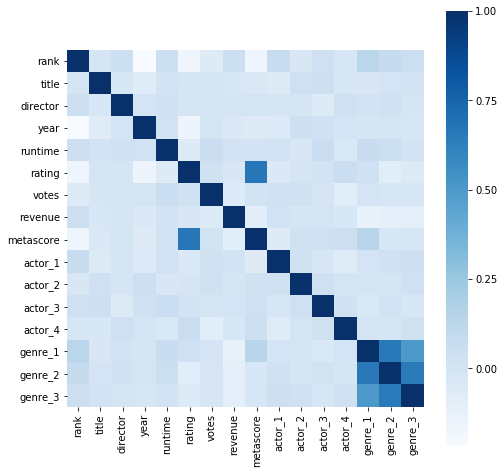

<Figure size 432x288 with 0 Axes>

In [52]:
#### Find  Correlation of Features
corr=movies_new.corr()['rank']
corr[np.argsort(corr,axis=0)[::-1]]

features_correlation = movies_new.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

plt.savefig('correlation_between_factors.png',dpi=fig.dpi,bbox_inches='tight')

#### Observations

- rating and metascore are highly corelated.
- Also, for the movies falling under multipe Genres, the individual genres have good corelation.
- But as such the remaining factors have very weak corelation.
- Interesting factor to note is that the revenue and rating have no corelation.

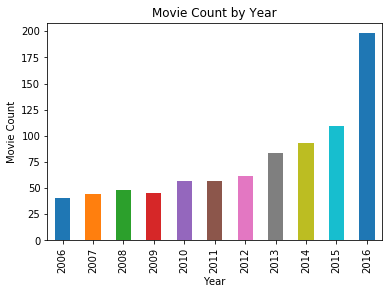

In [50]:
### 5. Identify patterns in the data

### 5.1. Movies produced per year

movie_yearly_count = movies['year'].value_counts().sort_index().plot.bar()
movie_yearly_count.set_xlabel('Year')
movie_yearly_count.set_ylabel('Movie Count')
movie_yearly_count.set_title('Movie Count by Year')

plt.savefig('movies_per_year.png',dpi=fig.dpi,bbox_inches='tight')

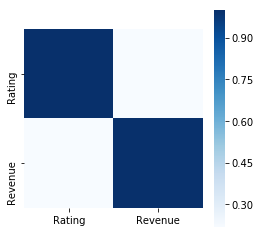

<Figure size 432x288 with 0 Axes>

In [53]:
### 5.2. Correlation between rating and revenue

df = pd.DataFrame({'Rating': movies['rating'], 'Revenue': movies['revenue']}) 

#print("Pearson:", df.corr())                                                                                    # Run a correlation calculation 
#print("")

features = df.corr()
plt.figure(figsize=(4,4))
sns.heatmap(features,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()
plt.savefig('correlation_bet_ratings_revenue.png',dpi=fig.dpi,bbox_inches='tight')

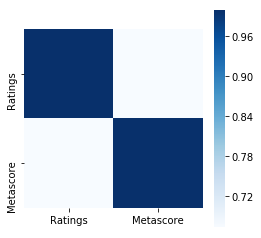

<Figure size 432x288 with 0 Axes>

In [54]:
### 5.2. Correlation between rating and metascore

df = pd.DataFrame({'Ratings': movies['rating'], 'Metascore': movies['metascore']}) 

#print("Pearson:", df.corr())                                                                                    # Run a correlation calculation 
#print("")

features = df.corr()
plt.figure(figsize=(4,4))
sns.heatmap(features,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()
plt.savefig('correlation_bet_ratings_metascore.png',dpi=fig.dpi,bbox_inches='tight')

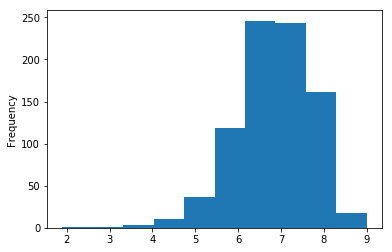

In [55]:
### 5.4. Rating distribution of movies

movies['rating'].plot.hist()
plt.savefig('ratings_distribution_for_movies.png',dpi=fig.dpi,bbox_inches='tight')

### Observation
Majority of the movies have rating between 6 - 8 (Average good movies)

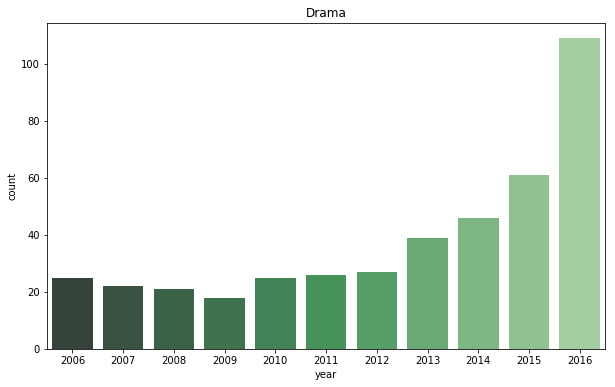

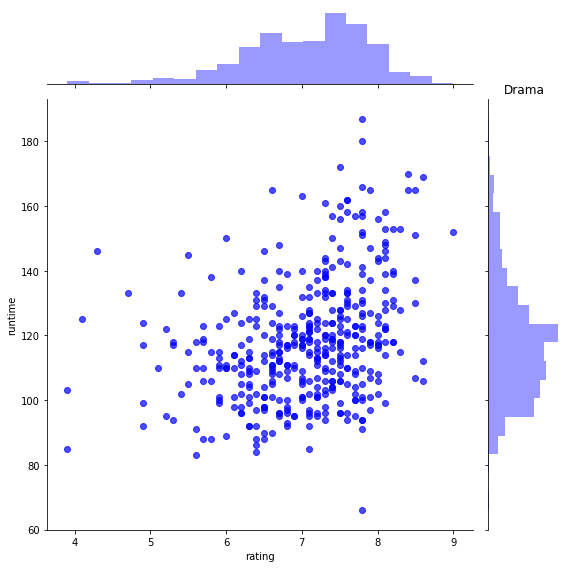

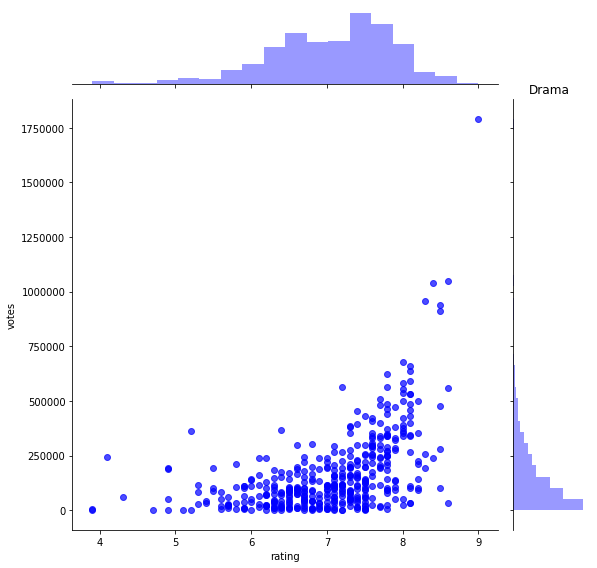

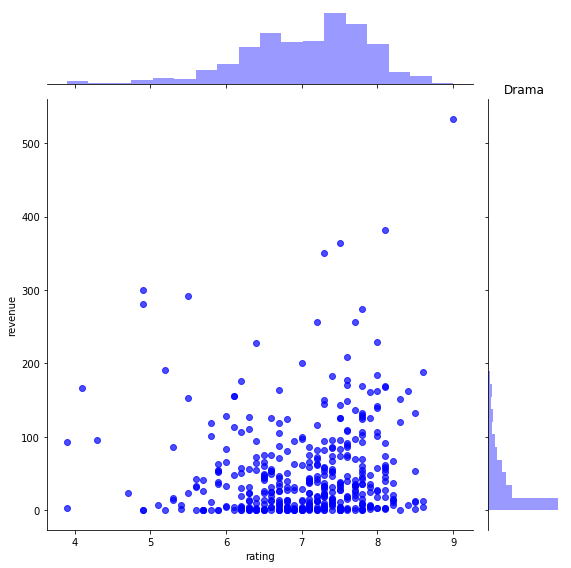

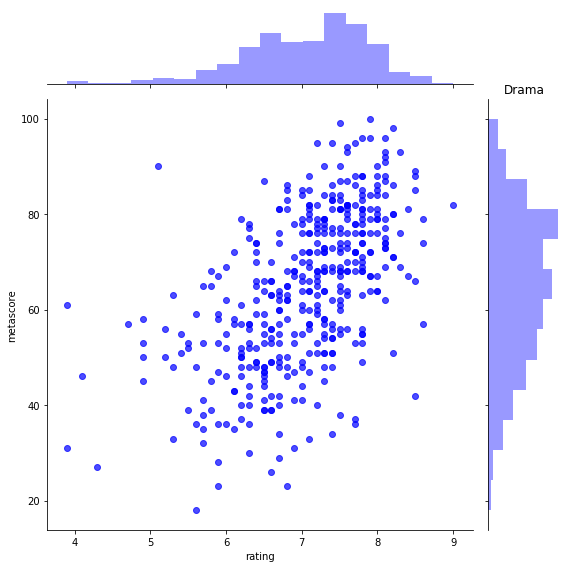

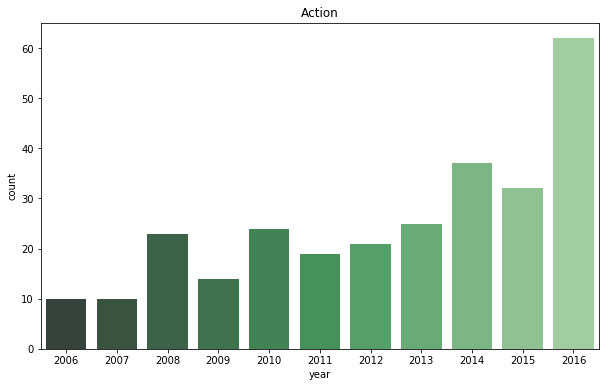

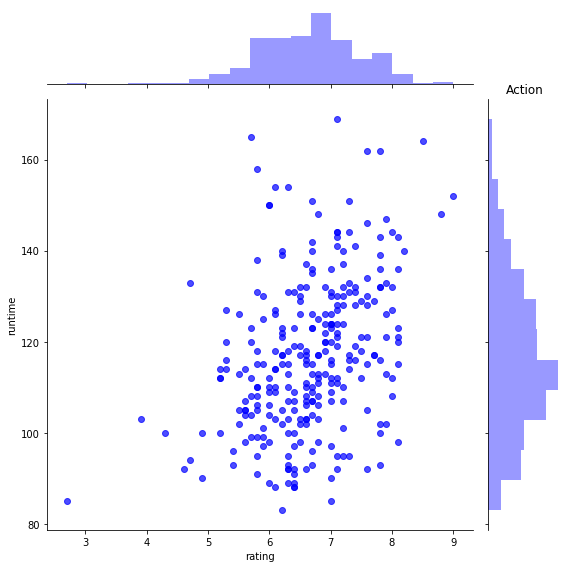

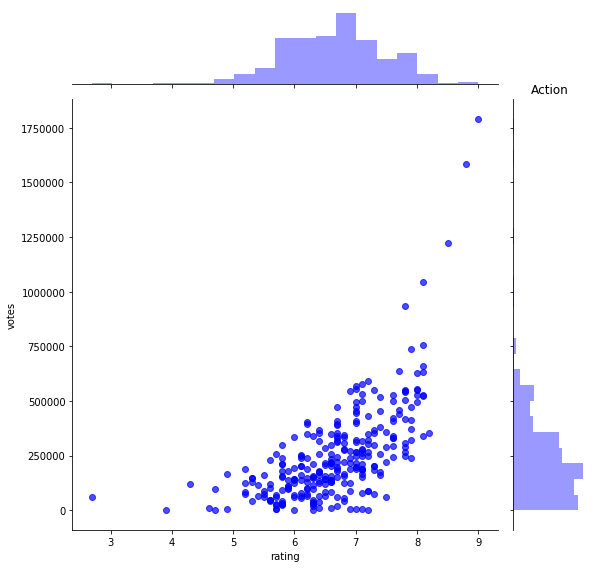

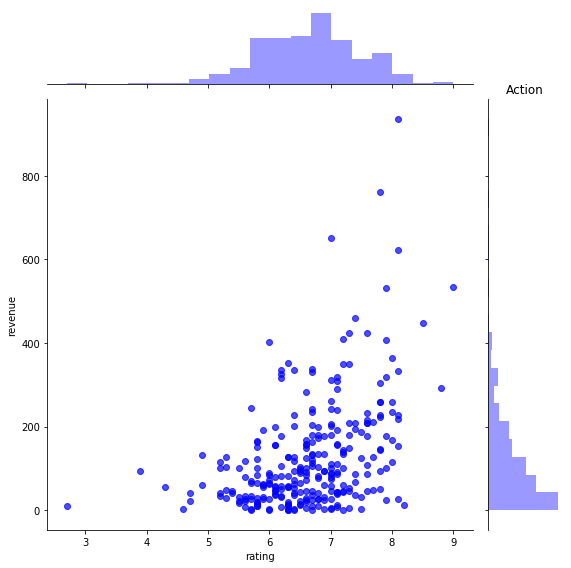

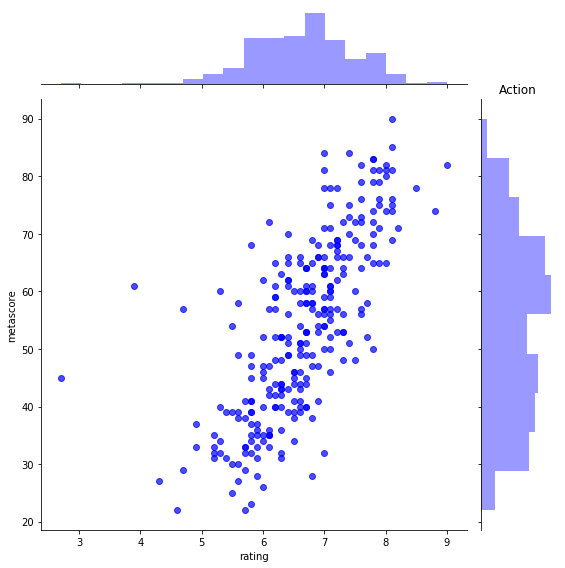

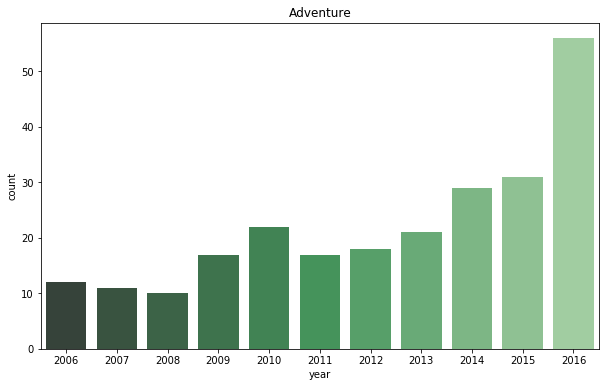

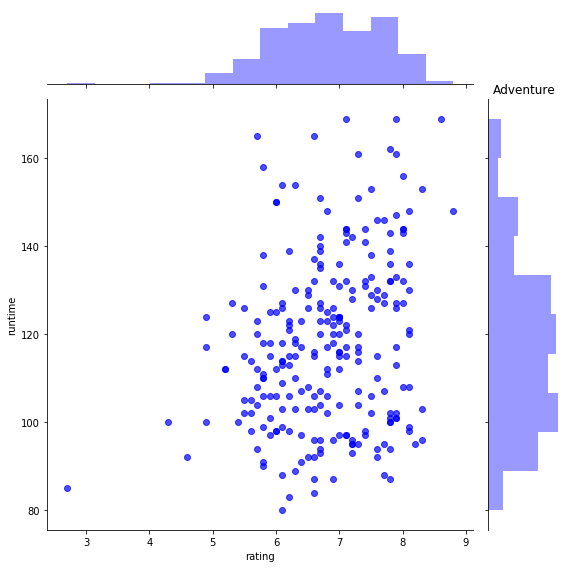

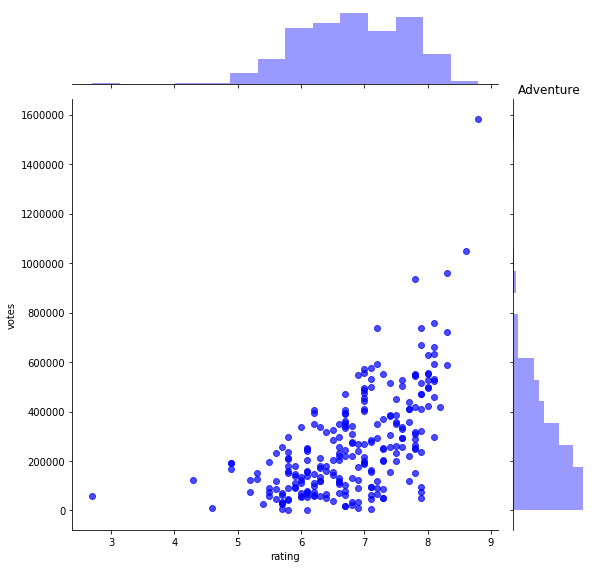

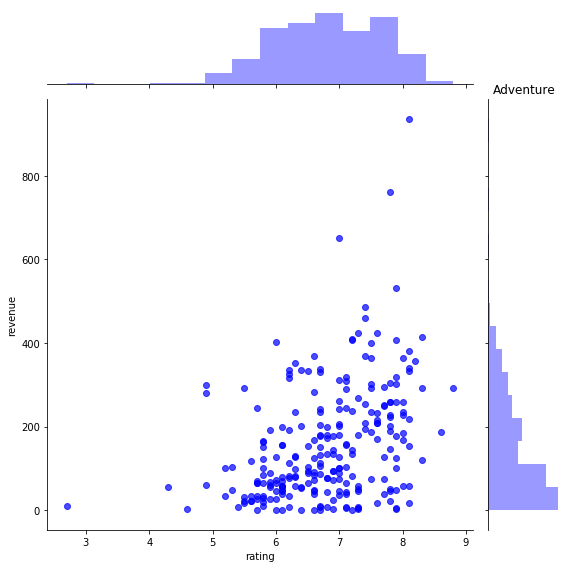

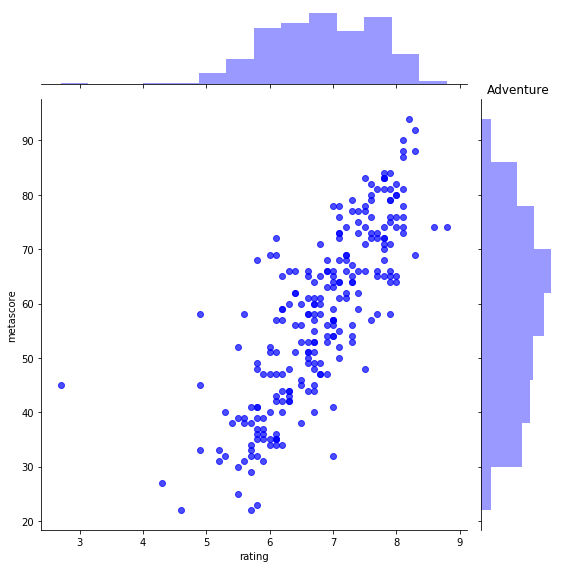

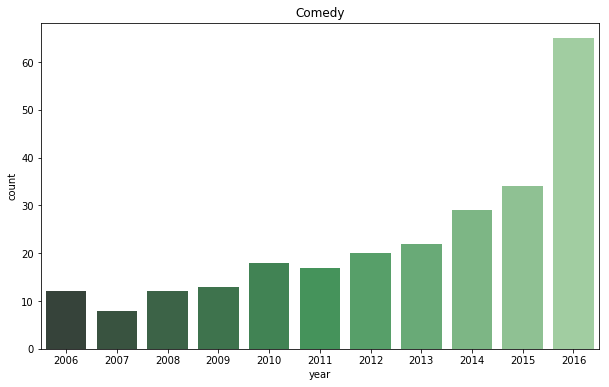

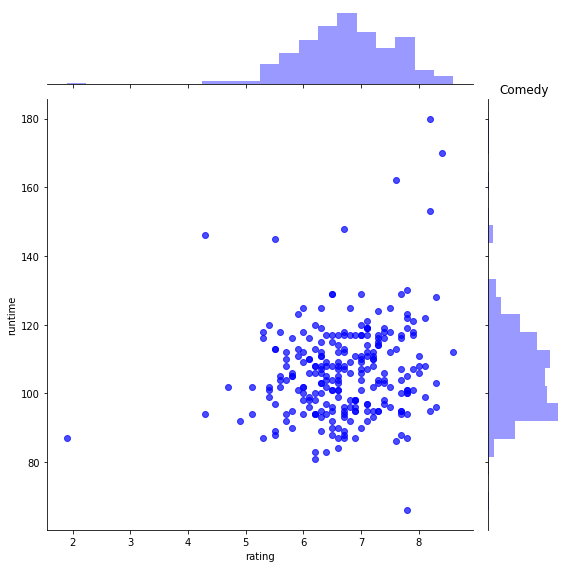

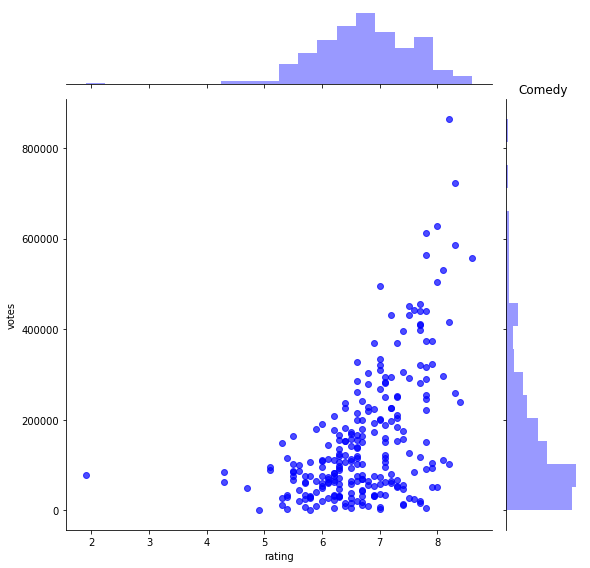

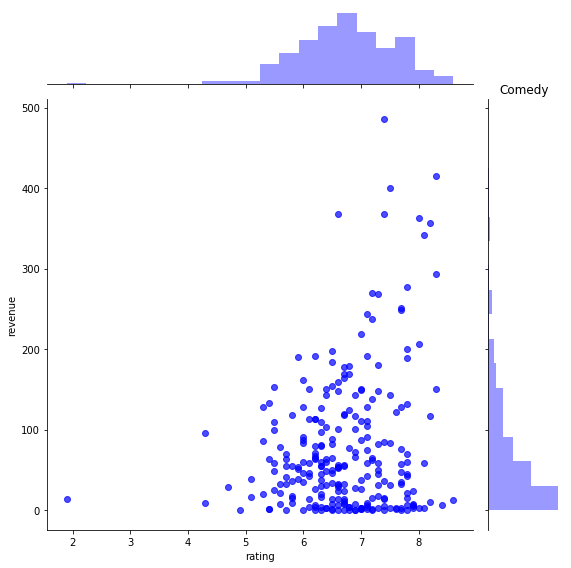

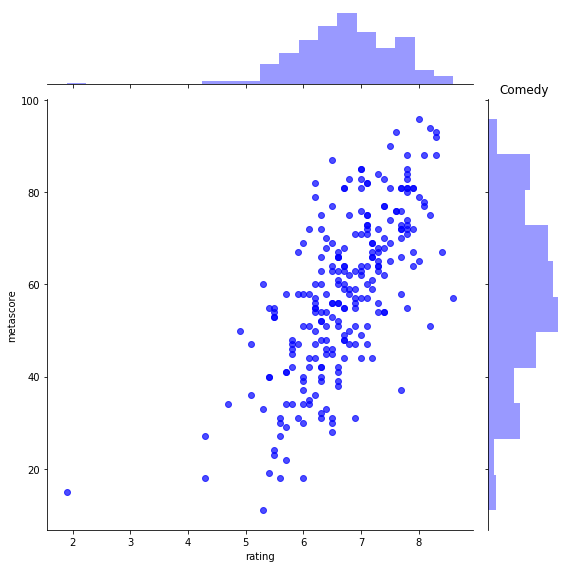

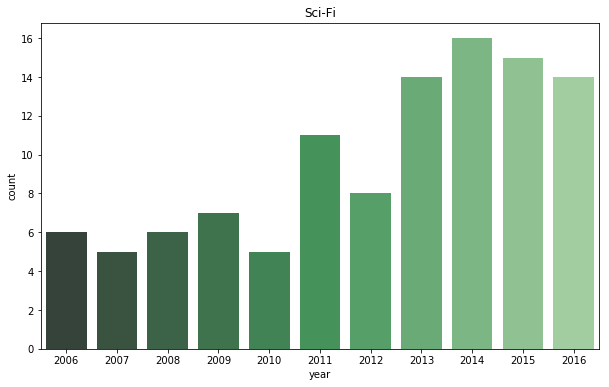

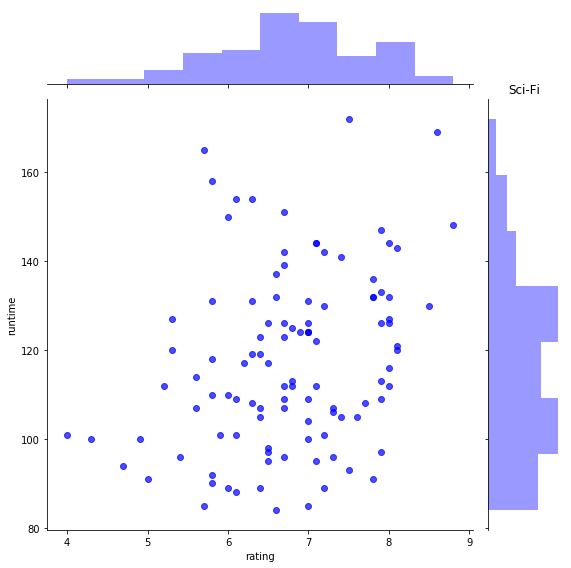

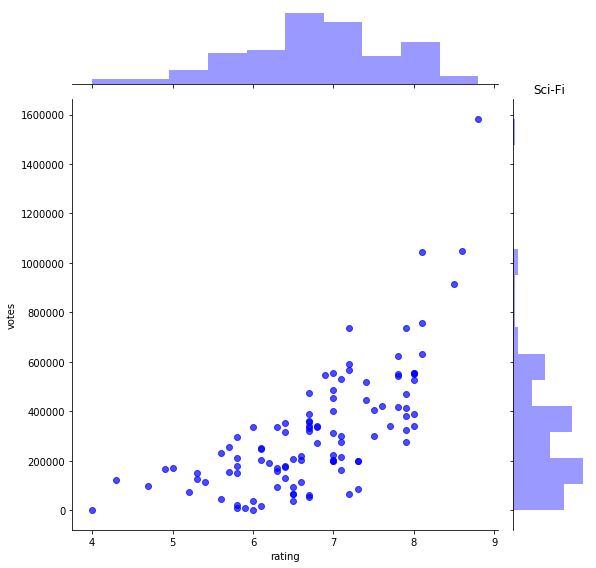

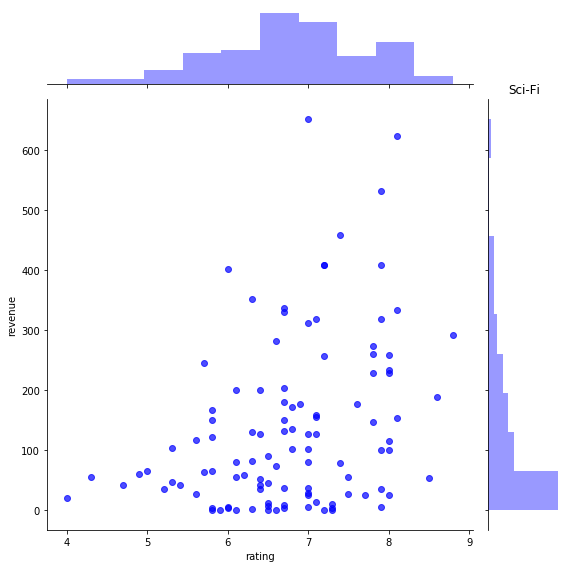

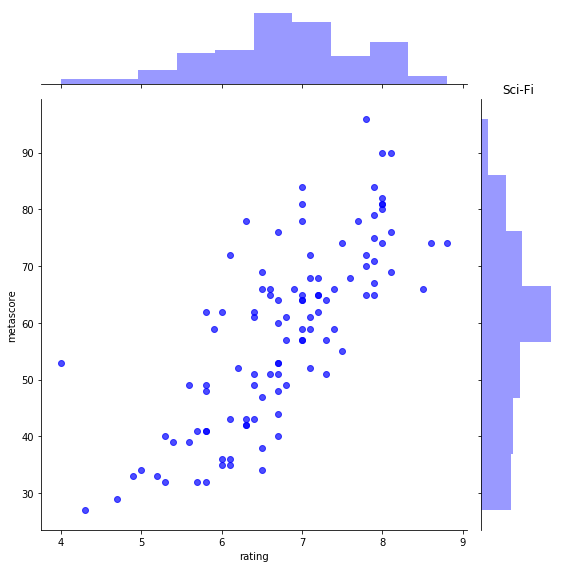

In [57]:
### 5.5. Genre wise Movie comparison

Top5Genres = ['Drama', 'Action', 'Adventure', 'Comedy', 'Sci-Fi']

for genre in Top5Genres:
    df = (movies['genre_1'] == genre) | (movies['genre_2'] == genre) | (movies['genre_3'] == genre)
    f, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(x='year', data=movies[df], palette="Greens_d");
    plt.title(genre)
    
    plt.savefig('top_genre_' + genre + '_yearly_movies.png',dpi=fig.dpi,bbox_inches='tight')
    
    compare_movies_rating = ['runtime', 'votes','revenue', 'metascore']
    for compare in compare_movies_rating:
        sns.jointplot(x='rating', y=compare, data=movies[df], alpha=0.7, color='b', height=8)
        plt.title(genre) 
        plt.savefig('top_genre_' + genre + '_rating_vs_'+compare+'_compare.png',dpi=fig.dpi,bbox_inches='tight')
         

In [ ]:
### Observations

pearsonr Values
- Drama 
    - Rating vs. Runtime - 0.35
    - Rating vs. Votes - 0.5
    - Rating vs. Revenue - 0.1
    - Rating vs. Metascore - 0.55
- Action
    - Rating vs. Runtime - 0.41
    - Rating vs. Votes - 0.61
    - Rating vs. Revenue - 0.4
    - Rating vs. Metascore - 0.71
- Adventure
    - Rating vs. Runtime - 0.27
    - Rating vs. Votes - 0.61
    - Rating vs. Revenue - 0.37
    - Rating vs. Metascore - 0.78
- Comedy
    - Rating vs. Runtime - 0.2
    - Rating vs. Votes - 0.54
    - Rating vs. Revenue - 0.22
    - Rating vs. Metascore - 0.69
- Sci-Fi
    - Rating vs. Runtime - 0.32
    - Rating vs. Votes - 0.71
    - Rating vs. Revenue - 0.34
    - Rating vs. Metascore - 0.73


['Chris Pratt' 'Noomi Rapace' 'James McAvoy' ... ' Roger Bart'
 ' Adam G. Sevani' 'Cheryl Hines']
1987
[3. 1. 4. ... 1. 1. 1.]


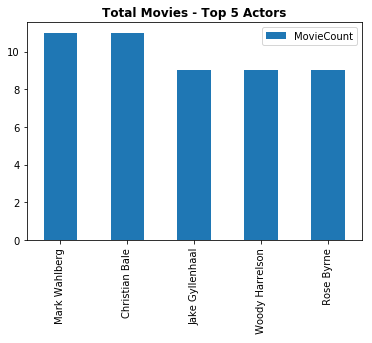

In [62]:
unique_actors = pd.concat([movies['actor_1'], movies['actor_2'], movies['actor_3'], movies['actor_4']]).unique()
unique_actors = unique_actors[unique_actors != None]
print (unique_actors)
print (len(unique_actors))

actor_movieCount = np.zeros(len(list(unique_actors)))
i = 0
for actor in unique_actors:
    current_actor = (movies['actor_1'] == actor) | (movies['actor_2'] == actor) | (movies['actor_3'] == actor) | (movies['actor_4'] == actor)
    actor_movieCount[i] = len(movies[current_actor])
    i += 1
print (actor_movieCount)

actor_df = pd.DataFrame(actor_movieCount, index=unique_actors, columns=['MovieCount'])
actor_df.sort_values(by='MovieCount', ascending=False).head(5).plot.bar()
actor_df
plt.ylabel('')
plt.title('Total Movies - Top 5 Actors', weight='bold')
plt.savefig('top_5_actors_total_movies.png')

[1243.07  126.46  442.18 ...   17.54   58.01   19.64]


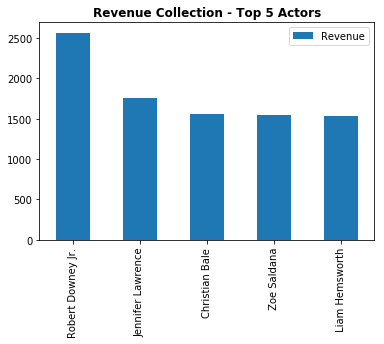

In [65]:

### 5.7. Lead Actors Revenue wise

actor_RevenueCount = np.zeros(len(list(unique_actors)))
i = 0
for actor in unique_actors:
        current_actor = (movies['actor_1'] == actor) | (movies['actor_2'] == actor) | (movies['actor_3'] == actor) | (movies['actor_4'] == actor)
        actor_RevenueCount[i] = movies[current_actor].xs('revenue', axis=1).sum() 
        i += 1
print (actor_RevenueCount)

actor_revenue_df = pd.DataFrame(actor_RevenueCount, index=unique_actors, columns=['Revenue'])
actor_revenue_df.sort_values(by='Revenue', ascending=False).head(5).plot.bar()
plt.ylabel('')
plt.title('Revenue Collection - Top 5 Actors', weight='bold')
plt.savefig('top_5_actors_revenue_share.png')

## Observation
Robert Downey - is a clear-cut favorite as far as the box-office is concerned.

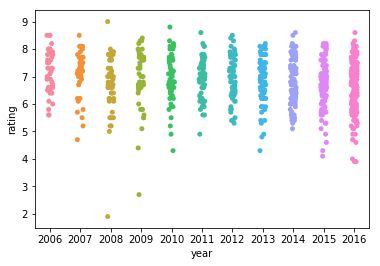

In [70]:

### 5.8. Ratings/Votes year wise


sns.stripplot(x="year", y="rating", data=movies, jitter=True)
#sns.swarmplot(x="year", y="rating", data=movies)

plt.savefig('year_vs_ratings.png')



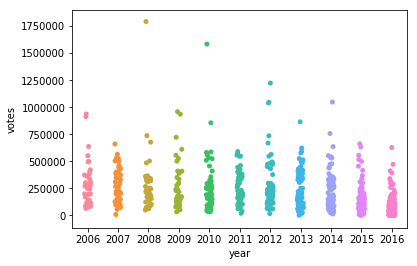

In [69]:


sns.stripplot(x="year", y="votes", data=movies, jitter=True)
#sns.swarmplot(x="year", y="votes", data=movies)

plt.savefig('year_vs_votes.png')



In [ ]:
### Observation
The number of votes are increasing year on year.

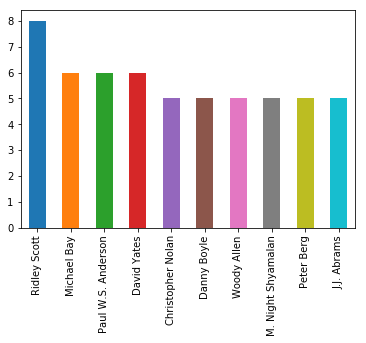

In [71]:

### Director vs. Movie Count

#print(movies.director.value_counts())
movies.director.value_counts()[:10].plot.bar(legend=False).get_figure().savefig('directors_vs_totalmovies.png', format='png')

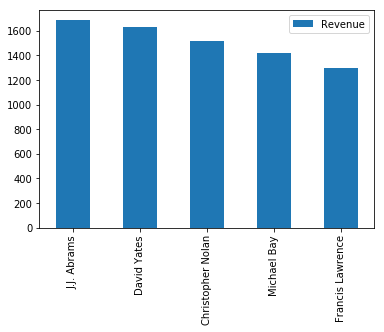

In [77]:
unique_directors = movies.director.unique()
director_RevenueCount = np.zeros(len(list(unique_directors)))
i = 0
for direc in unique_directors:
    current_director = (movies['director'] == direc)
    director_RevenueCount[i] = movies[current_director].xs('revenue', axis=1).sum() 
    i += 1
# print (director_RevenueCount)

director_revenue_df = pd.DataFrame(director_RevenueCount, index=unique_directors, columns=['Revenue'])
director_revenue_df.sort_values(by='Revenue', ascending=False).head(5).plot.bar().get_figure().savefig('director_vs_revenue.png', format='png')

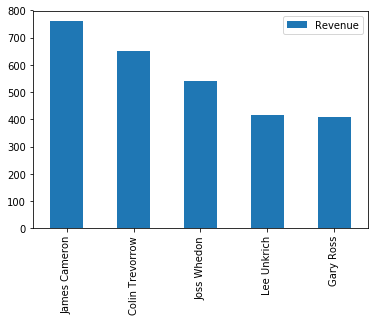

In [78]:
unique_directors = movies.director.unique()
director_RevenueCount = np.zeros(len(list(unique_directors)))
i = 0
for direc in unique_directors:
    current_director = (movies['director'] == direc)
    director_RevenueCount[i] = movies[current_director].xs('revenue', axis=1).sum() 
    i += 1
# print (director_RevenueCount)

director_revenue_df = pd.DataFrame(director_RevenueCount, index=unique_directors, columns=['Revenue'])
director_revenue_df = director_revenue_df.apply(lambda x: x / movies.director.value_counts())   

director_revenue_df.sort_values(by='Revenue', ascending=False).head(5).plot.bar().get_figure().savefig('director_vs_revenue%.png', format='png')

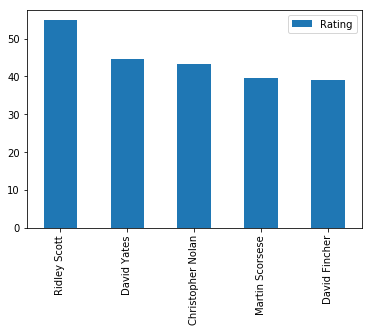

In [79]:
director_ratingCount = np.zeros(len(list(unique_directors)))
i = 0
for direc in unique_directors:
    current_director = (movies['director'] == direc)
    director_ratingCount[i] = movies[current_director].xs('rating', axis=1).sum() 
    i += 1
# print (director_RevenueCount)

director_rating_df = pd.DataFrame(director_ratingCount, index=unique_directors, columns=['Rating'])
director_rating_df.sort_values(by='Rating', ascending=False).head(5).plot.bar().get_figure().savefig('director_vs_ratings.png', format='png')

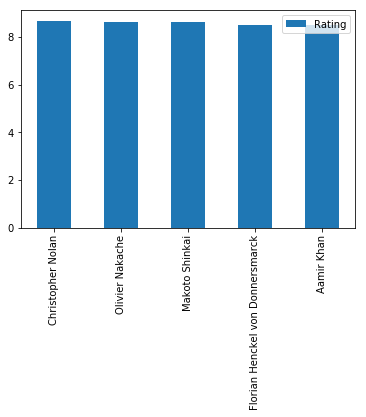

In [80]:
director_ratingCount = np.zeros(len(list(unique_directors)))
i = 0
for direc in unique_directors:
    current_director = (movies['director'] == direc)
    director_ratingCount[i] = movies[current_director].xs('rating', axis=1).sum() 
    i += 1
# print (director_RevenueCount)

director_rating_df = pd.DataFrame(director_ratingCount, index=unique_directors, columns=['Rating'])
director_rating_df = director_rating_df.apply(lambda x: x / movies.director.value_counts())   
director_rating_df.sort_values(by='Rating', ascending=False).head(5).plot.bar().get_figure().savefig('director_vs_ratings%.png', format='png')

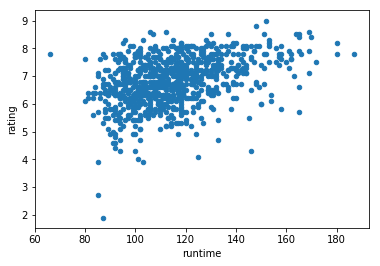

In [83]:

### 5.10. Runtime vs. Rating

f = movies.sort_values(by='rating', ascending=False)
f.plot.scatter(x='runtime', y='rating')
plt.savefig('runtime_vs_rating.png')

## Observation
Majority of the films that have good rating (>6) have a runtime between 80 - 120 minutes.

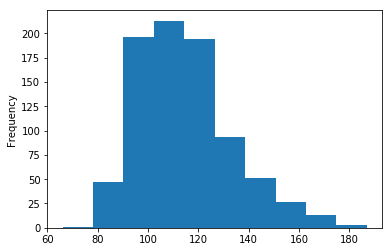

In [6]:
movies['runtime'].plot.hist()
plt.savefig('runtime_histogram.png')


## Analysis through questions

<a id=section601><a/>

### What are the top ten movies?


<a id=section602><a/>

#### In terms of revenue

In [7]:
movies.sort_values(by='revenue', ascending=False).head(10)[['title','director', 'revenue', 'rating', 'genre_1']]

title           director  revenue  \
41   Star Wars: Episode VII - The Force Awakens        J.J. Abrams   936.63   
76                                       Avatar      James Cameron   760.51   
74                               Jurassic World    Colin Trevorrow   652.18   
65                                 The Avengers        Joss Whedon   623.28   
45                              The Dark Knight  Christopher Nolan   533.32   
11                                    Rogue One     Gareth Edwards   532.17   
104                                Finding Dory     Andrew Stanton   486.29   
83                      Avengers: Age of Ultron        Joss Whedon   458.99   
108                       The Dark Knight Rises  Christopher Nolan   448.13   
502             The Hunger Games: Catching Fire   Francis Lawrence   424.65   

     rating    genre_1  
41      8.1     Action  
76      7.8     Action  
74      7.0     Action  
65      8.1     Action  
45      9.0     Action  
11      7.9     Action  
104     7.4  Animation  
83      7.4     Action  
108     8.5     Action  
502     7.6     Action

<a id=section603><a/>

#### In terms of rating

In [8]:
movies.sort_values(by='rating', ascending=False).head(10)[['title','director', 'revenue', 'rating', 'genre_1']]

title                          director  revenue  rating  \
45         The Dark Knight                 Christopher Nolan   533.32     9.0   
69               Inception                 Christopher Nolan   292.57     8.8   
31            Interstellar                 Christopher Nolan   187.99     8.6   
221       The Intouchables                   Olivier Nakache    13.18     8.6   
85           Kimi no na wa                    Makoto Shinkai     4.68     8.6   
108  The Dark Knight Rises                 Christopher Nolan   448.13     8.5   
832       Taare Zameen Par                        Aamir Khan     1.20     8.5   
117               Whiplash                   Damien Chazelle    13.09     8.5   
88            The Departed                   Martin Scorsese   132.37     8.5   
420    The Lives of Others  Florian Henckel von Donnersmarck    11.28     8.5   

       genre_1  
45      Action  
69      Action  
31   Adventure  
221  Biography  
85   Animation  
108     Action  
832      Drama  
117      Drama  
88       Crime  
420      Drama

<a id=section604><a/>

#### In terms of votes cast

In [81]:
movies.sort_values(by='votes', ascending=False).head(10)[['title','director', 'revenue', 'rating', 'genre_1']]

title           director  revenue  rating    genre_1
54         The Dark Knight  Christopher Nolan   533.32     9.0     Action
80               Inception  Christopher Nolan   292.57     8.8     Action
124  The Dark Knight Rises  Christopher Nolan   448.13     8.5     Action
36            Interstellar  Christopher Nolan   187.99     8.6  Adventure
76            The Avengers        Joss Whedon   623.28     8.1     Action
144       Django Unchained  Quentin Tarantino   162.80     8.4      Drama
77    Inglourious Basterds  Quentin Tarantino   120.52     8.3  Adventure
99            The Departed    Martin Scorsese   132.37     8.5      Crime
87                  Avatar      James Cameron   760.51     7.8     Action
64            The Prestige  Christopher Nolan    53.08     8.5      Drama

<a id=section605><a/>

#### What was the most successfull genre?

In [9]:
print ("Rating")
print (movies.sort_values(by='rating', ascending=False).head(10)['genre_1'].value_counts())
print ("Revenue")
print (movies.sort_values(by='revenue', ascending=False).head(10)['genre_1'].value_counts())
print ("Votes")
print (movies.sort_values(by='votes', ascending=False).head(10)['genre_1'].value_counts())

Rating
Action       3
Drama        3
Adventure    1
Crime        1
Biography    1
Animation    1
Name: genre_1, dtype: int64
Revenue
Action       9
Animation    1
Name: genre_1, dtype: int64
Votes
Action       5
Adventure    2
Drama        2
Crime        1
Name: genre_1, dtype: int64


<a id=section606><a/>

#### What movies have low rating but high revenue?

In [11]:
movies.sort_values(by='revenue', ascending=False).head(20)[['title','director', 'revenue', 'rating', 'genre_1']][movies['rating'] < 6]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Empty DataFrame
Columns: [title, director, revenue, rating, genre_1]
Index: []

None

<a id=section607><a/>

#### What movies have high rating but failed to collect revenue?

In [12]:
movies.sort_values(by='rating', ascending=False).head(50)[['title','director', 'revenue', 'rating', 'genre_1']][movies['revenue'] < movies['revenue'].mean()]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


title                          director  revenue  \
221          The Intouchables                   Olivier Nakache    13.18   
85              Kimi no na wa                    Makoto Shinkai     4.68   
832          Taare Zameen Par                        Aamir Khan     1.20   
117                  Whiplash                   Damien Chazelle    13.09   
420       The Lives of Others  Florian Henckel von Donnersmarck    11.28   
54               The Prestige                 Christopher Nolan    53.08   
380                  3 Idiots                   Rajkumar Hirani     6.52   
400                    Jagten                 Thomas Vinterberg     0.61   
656                        PK                   Rajkumar Hirani    10.57   
640    El secreto de sus ojos              Juan José Campanella    20.17   
202           Pan's Labyrinth                Guillermo del Toro    37.62   
171                   Warrior                    Gavin O'Connor    13.65   
612                 Incendies                  Denis Villeneuve     6.86   
126                      Room                  Lenny Abrahamson    14.68   
15              Hacksaw Ridge                        Mel Gibson    67.12   
98           12 Years a Slave                     Steve McQueen    56.67   
128                 Ah-ga-ssi                    Chan-wook Park     2.01   
169                 Spotlight                      Tom McCarthy    44.99   
79                  Prisoners                  Denis Villeneuve    60.96   
556          Relatos salvajes                    Damián Szifron     3.08   
173             Into the Wild                         Sean Penn    18.35   
528                     Mommy                      Xavier Dolan     3.49   
17                       Lion                       Garth Davis    51.69   
266       There Will Be Blood              Paul Thomas Anderson    40.22   
299                      Rush                        Ron Howard    26.90   
120    No Country for Old Men                        Ethan Coen    74.27   
210  The Grand Budapest Hotel                      Wes Anderson    59.07   

     rating    genre_1  
221     8.6  Biography  
85      8.6  Animation  
832     8.5      Drama  
117     8.5      Drama  
420     8.5      Drama  
54      8.5      Drama  
380     8.4     Comedy  
400     8.3      Drama  
656     8.2     Comedy  
640     8.2      Drama  
202     8.2      Drama  
171     8.2     Action  
612     8.2      Drama  
126     8.2      Drama  
15      8.2  Biography  
98      8.1  Biography  
128     8.1      Drama  
169     8.1      Crime  
79      8.1      Crime  
556     8.1     Comedy  
173     8.1  Adventure  
528     8.1      Drama  
17      8.1  Biography  
266     8.1      Drama  
299     8.1     Action  
120     8.1      Crime  
210     8.1  Adventure


### What is the trend of rating, revenue and runtime over years?



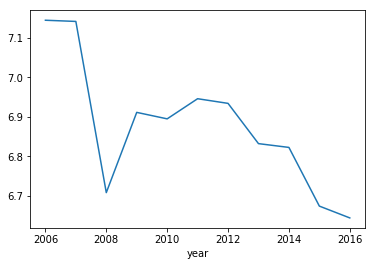

In [15]:
yearMov = movies.groupby('year')
yearMov.mean()['rating'].plot.line()
plt.savefig('year_vs_ratings_mean_trend.png')

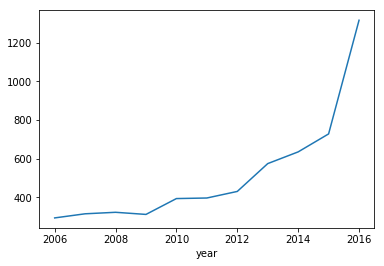

In [19]:
yearMov.sum()['rating'].plot.line()
plt.savefig('year_vs_ratings_sum_trend.png')

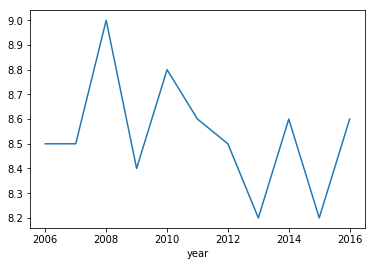

In [20]:
yearMov['rating'].max().plot.line()
plt.savefig('year_vs_ratings_max_trend.png')

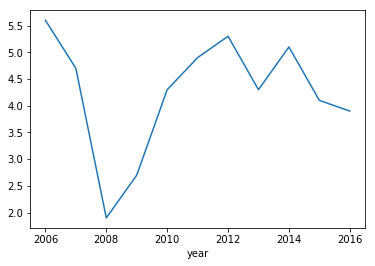

In [21]:
yearMov['rating'].min().plot.line()
plt.savefig('year_vs_ratings_min_trend.png')


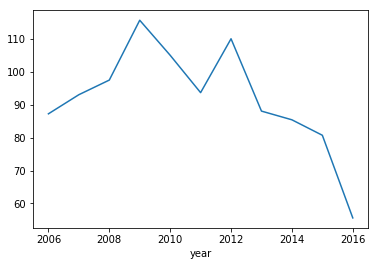

In [22]:
    yearMov.mean()['revenue'].plot.line()
    plt.savefig('year_vs_revenue_mean_trend.png')


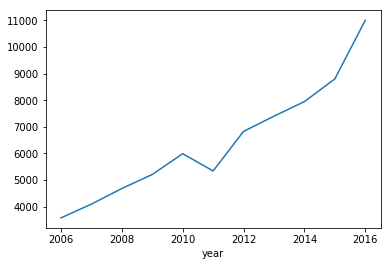

In [23]:
yearMov.sum()['revenue'].plot.line()
plt.savefig('year_vs_revenue_sum_trend.png')



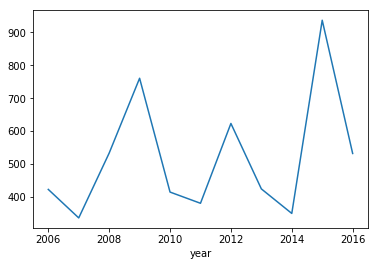

In [24]:
yearMov['revenue'].max().plot.line()
plt.savefig('year_vs_revenue_max_trend.png')


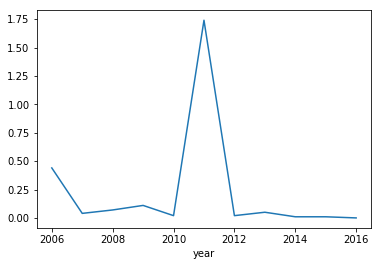

In [25]:
yearMov['revenue'].min().plot.line()
plt.savefig('year_vs_revenue_min_trend.png')


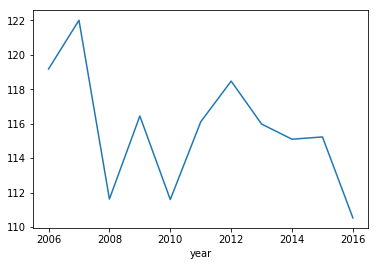

In [26]:
yearMov['runtime'].mean().plot.line()
plt.savefig('year_vs_runtime_mean_trend.png')


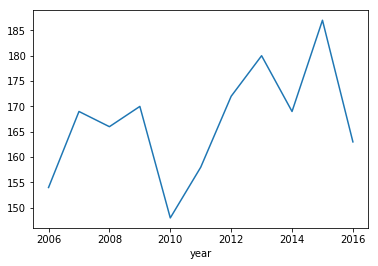

In [27]:
yearMov['runtime'].max().plot.line()
plt.savefig('year_vs_runtime_max_trend.png')



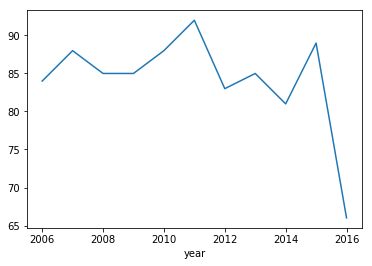

In [28]:
yearMov['runtime'].min().plot.line()
plt.savefig('year_vs_runtime_min_trend.png')

<a id=section7></a> 

## Conclusion

- The data set gives us insights about the 1000 movies released in between 2006 - 2016.
    - The movies are spread across 20 different Genres. 
        - Adventure and Action movies are having a good market at the box office followed by Drama, Comedy and Sci-Fi movies.
        - But the highest number of movies were made in the Drama genre followed by action and comedy.
        - The least favorite genres are Musical, Western and War.
        - As the number of movies made in these genres are less, their collections are also correspondinglylow.
        - Drama movies are rated much higher compared to any other Genres. 
    - The number of movies almost doubled from 2015 to 2016. Till 2013, the number of movies made was around 50 but the trend started changing from 2013.
    - Rating and metascore are highly correlated wheread Revenue and Rating have low correlation.  (Section 5.2)
    - Majority of the movies have rating between 6 - 8 (Average good movies)(Section 5.4)
    - The best movie in terms of rating and votes cast is "The Dark Knight" whereas in terms of revenue, it is "Star Wars: Episode VII - The Force Awakens". 
    - The lead actor who succeeded at the box office is "Robert Downey Junior" and in terms of number of movies it is "Christian Bale" 
    - The person to direct more number of movies in this period is "Ridley Scott" but the one to understand the pulse of the audience is "J.J. Abrams" with more collections. (Section 5.9)
    - The directors with high success ratio are Nitesh Tiwari followed by Christopher Nolan. (Section 5.9)
    - Movies taken in Action genre were successful in all the three categories - rating, votes and revenue. (Overall)
    - Of the top 50 highly rated movies, 25 (50%) of them reported very low revenues. Mostly in the drama genre. (Section 6.1). Another interesting fact about these movies is that they contain the Indian movies.
    - Majority of the films that have good rating (>6) have a runtime between 80 - 120 minutes. (Section 5.10)
    
    - Trend over the years 
        - The average rating is declining over the years but as the number of movies are more in number the total rating per year is increasing.
        - The average revenue is also on the declining probably owing to the drama movies but the overall box office collections are increasing year on year.
        - The average runtime of movies are on the declining trend (from 120 min to 106 min)
- More people are going to the cinemas after 2013 than before and they are preferring short movies packed with adventure, action rather than drama.
- The average revenue per movie is decreasing though the overall collections are on the rise.
- High revenue collection movies have high ratings but the vice-versa is not true. That is highly rated or crtically acclaimed movies failed to collect money.
    
    


<a id=section601><a/>

<a id=section602><a/>